Current working directory: /home/astro/Documents/GitHub/ALMASim/experimental
Path to the parent directory: /home/astro/Documents/GitHub/ALMASim/experimental/..
           GHz        Jy
5000  0.029979  0.001073
4999  0.030145  0.001082
4998  0.030312  0.001092
4997  0.030480  0.001101
4996  0.030649  0.001111
4995  0.030819  0.001120
4994  0.030990  0.001129
4993  0.031162  0.001139
4992  0.031334  0.001148
4991  0.031508  0.001157
5995849.159994003 21464366.151609447


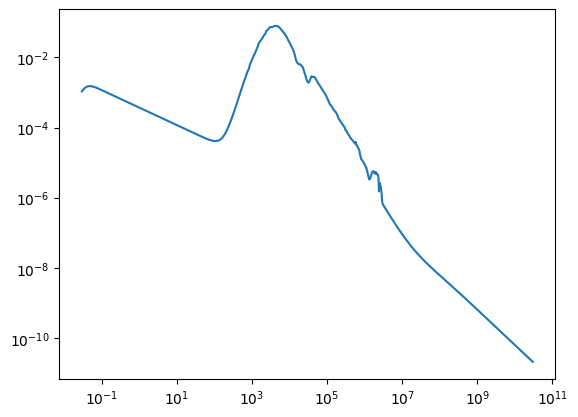

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from astropy.cosmology import FlatLambdaCDM
from astropy import units as U
from scipy.constants import c
import sys
current_path = os.getcwd()
parent_dir = os.path.join(current_path, "..")
print("Current working directory:", current_path)
print("Path to the parent directory:",parent_dir)
sys.path.append(parent_dir)
import utility.alma as au
import utility.astro as asu
import matplotlib.pyplot as plt

sed = asu.sed_reading("point", os.path.join(parent_dir, 'brightnes'))
print(sed.head(10))

freq = sed['GHz'].values
freq_sup = []
for i in range(len(freq) - 1):
    freq_sup.append(freq[i + 1] - freq[i])

print(np.mean(freq_sup), np.std(freq_sup))

plt.plot(freq, sed['Jy'].values)
plt.xscale('log')
plt.yscale('log')
plt.show()




(array([4583.,  125.,   74.,   52.,   40.,   33.,   28.,   24.,   21.,
          20.]),
 array([1.66131172e-04, 1.65229280e+07, 3.30458559e+07, 4.95687839e+07,
        6.60917118e+07, 8.26146398e+07, 9.91375677e+07, 1.15660496e+08,
        1.32183424e+08, 1.48706352e+08, 1.65229280e+08]),
 <BarContainer object of 10 artists>)

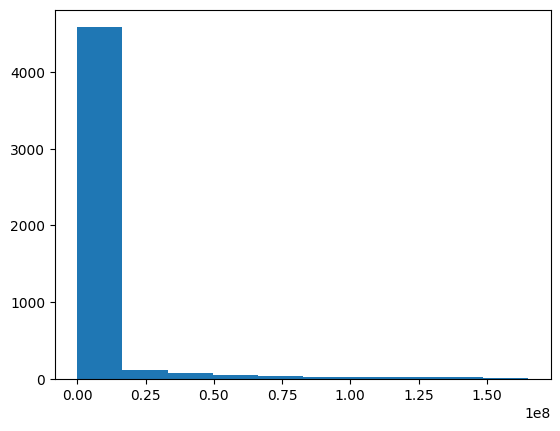

In [6]:
freq_sup = np.array(freq_sup)
plt.hist(freq_sup)

In [ ]:
db = pd.read_csv(os.path.join(parent_dir, 'brightnes','SED_low_z_type2_AGN.dat'), sep='\s+')
db2= pd.read_csv(os.path.join(parent_dir, 'brightnes','SED_low_z_warm_star_forming_galaxy.dat'), sep='\s+')
db['Frequency'] = u.Quantity(db['um'], unit=u.micrometer).to(u.GHz, equivalencies=u.spectral())
db2['Frequency'] =  u.Quantity(db2['um'], unit=u.micrometer).to(u.GHz, equivalencies=u.spectral())
plt.figure(figsize=[10,8])
plt.plot(db['um'],db['erg/s/Hz'], color='green', label='SED_low_z_type2_AGN')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\lambda$(${\mu}m$)')
plt.ylabel('log(PSD)(erg/s/Hz)')
plt.legend()
plt.show()
plt.figure(figsize=[10,8])
plt.plot(db2['um'],db2['erg/s/Hz'], color='red',label='SED_low_z_warm_star_forming_galaxy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\lambda$(${\mu}m$)')
plt.ylabel('log(PSD)(erg/s/Hz)')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=[10,8])
plt.plot(db['Frequency'],db['erg/s/Hz'], color='green', label='SED_low_z_type2_AGN')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\\nu$(GHz)')
plt.ylabel('log(PSD)(erg/s/Hz)')
plt.legend()
plt.show()
plt.figure(figsize=[10,8])
plt.plot(db2['Frequency'],db2['erg/s/Hz'], color='red',label='SED_low_z_warm_star_forming_galaxy')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\\nu$(GHz)')
plt.ylabel('log(PSD)(erg/s/Hz)')
plt.legend()
plt.show()

In [ ]:
Alma_band= {
    'Band':['Band 1','Band 2','Band 3','Band 4','Band 5','Band 6','Band 7','Band 8','Band 9','Band 10'],
    'Freq_Range' : [
        (35,50),
        (67,116),
        (84,116),
        (125,163),
        (163,211),
        (211,275),
        (275,373),
        (385,500),
        (602,720),
        (787,950),
    ]
}
df=pd.DataFrame(Alma_band)
plt.figure(figsize=[20,18])
plt.plot(db['Frequency'],db['erg/s/Hz'], color='green', label='SED_low_z_type2_AGN')
plt.plot(db2['Frequency'],db2['erg/s/Hz'], color='red',label='SED_low_z_warm_star_forming_galaxy')
color_map = plt.colormaps.get_cmap('tab10')
for index, row in df.iterrows():
    color = color_map(index)
    plt.axvspan(row['Freq_Range'][0], row['Freq_Range'][1], color=color, alpha=0.3, label=row['Band'])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\\nu$(GHz)')
plt.ylabel('log(PSD)(erg/s/Hz)')
plt.legend()
plt.show()

In [ ]:
cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Tcmb0=2.725 * u.K, Om0=0.3)
db['Jy']=(db['erg/s/Hz']/((10.**(-26.))*(10.**7.)*4.*np.pi*(cosmo.luminosity_distance(0.05).value*(3.086e+22))**2.))*(3.846e+33*1e+10)
db2['Jy']=db2['erg/s/Hz']/((10.**(-26.))*(10.**7.)*4.*np.pi*(cosmo.luminosity_distance(0.0001).value*(3.086e+22))**2.)*(3.846e+33*1e+9)
plt.figure(figsize=[20,18])
plt.plot(db['Frequency'],db['Jy'], color='green', label='SED_low_z_type2_AGN')
plt.plot(db2['Frequency'],db2['Jy'], color='red',label='SED_low_z_warm_star_forming_galaxy')
color_map = plt.colormaps.get_cmap('tab10')
for index, row in df.iterrows():
    color = color_map(index)
    plt.axvspan(row['Freq_Range'][0], row['Freq_Range'][1], color=color, alpha=0.3, label=row['Band'])

plt.xscale('log')
plt.yscale('log')
plt.xlabel('log$\\nu$(GHz)')
plt.ylabel('log(Jy)')
plt.legend()
plt.show()

In [ ]:
print(db)
print(db2)